In [ ]:
mport numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving book.csv to book (2).csv


In [ ]:
population = pd.read_csv('book (2).csv')

In [ ]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15312 entries, 0 to 15311
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              15312 non-null  int64  
 1   Country Name    15312 non-null  object 
 2   Country Code    15312 non-null  object 
 3   Indicator Name  15312 non-null  object 
 4   Indicator Code  15312 non-null  object 
 5   Year            15312 non-null  int64  
 6   population      15147 non-null  float64
 7   yearly change   15278 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 957.1+ KB


In [ ]:
population.describe()

,id,Year,population
count,15312.000000,15312.000000,1.514700e+04
mean,131.500000,1988.500000,2.060336e+08
std,76.212177,16.741216,6.792908e+08
min,0.000000,1960.000000,4.279000e+03
25%,65.750000,1974.000000,9.250650e+05
50%,131.500000,1988.500000,6.344722e+06
75%,197.250000,2003.000000,4.219871e+07
max,263.000000,2017.000000,7.530360e+09


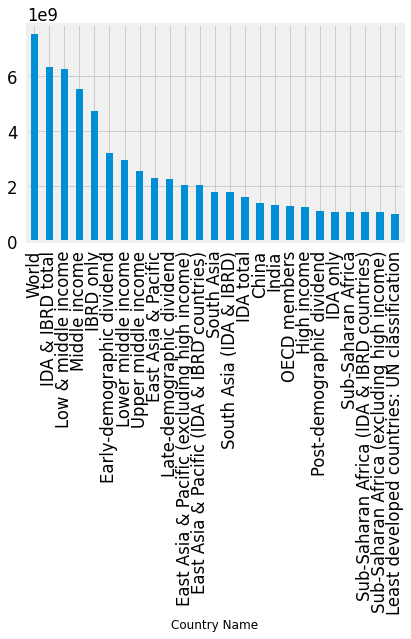

In [ ]:
year = 2017
df_last_year = population[population['Year'] == year]
series_last_year = df_last_year.groupby('Country Name')['population'].sum().sort_values(ascending=False).head(25)
series_last_year.plot(kind='bar')

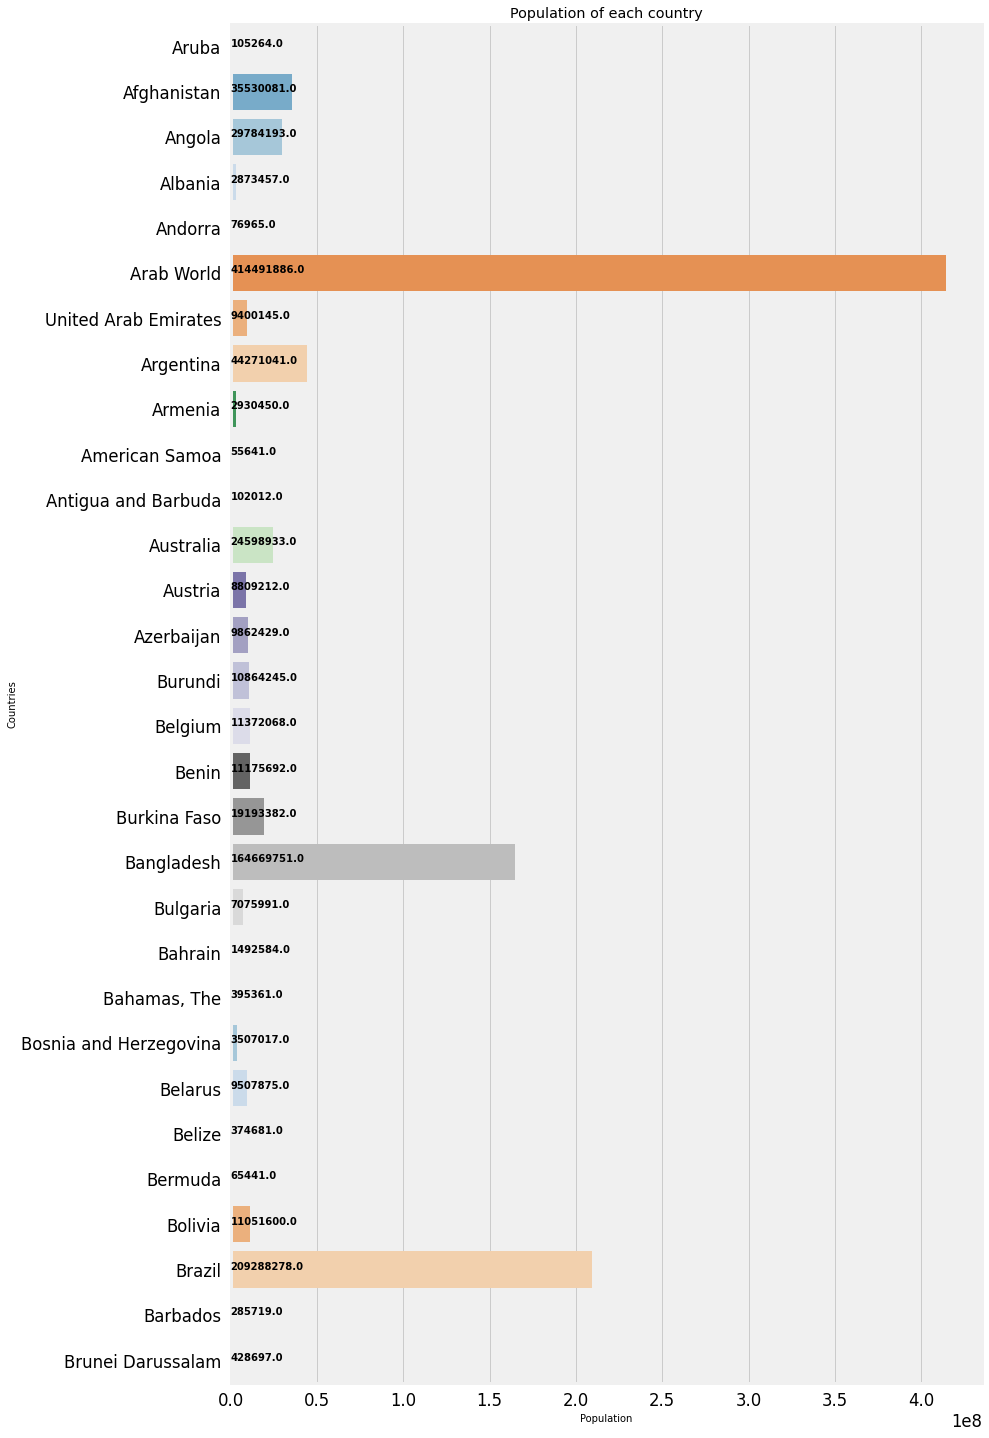

In [ ]:
plt.figure(figsize=(12,25))
ax = sns.barplot(x="population", y="Country Name",
                 data=current_population, palette="tab20c",
                 linewidth = 1)
for i,j in enumerate(current_population["population"]):
    ax.text(.5, i, j, weight="bold", color = 'black', fontsize =10)
plt.title("Population of each country")
ax.set_xlabel(xlabel = 'Population', fontsize = 10)
ax.set_ylabel(ylabel = 'Countries', fontsize = 10)
plt.show(263)

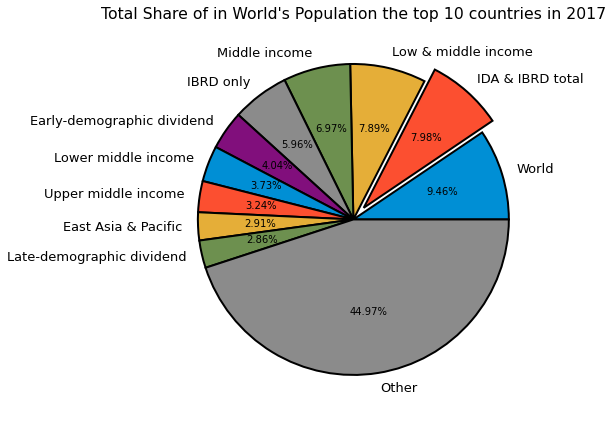

In [ ]:
unique_countries = population['Country Name'].unique()
plt.style.use("seaborn-talk")


# set year
year = 2017
df_last_year = population[population['Year'] == year]
series_last_year = df_last_year.groupby('Country Name')['population'].sum().sort_values(ascending=False)

labels = []
values = []
country_count = 10
other_total = 0
for country in series_last_year.index:
    if country_count > 0:
        labels.append(country)
        values.append(series_last_year[country])
        country_count -= 1
    else:
        other_total += series_last_year[country]
labels.append("Other")
values.append(other_total)

wedge_dict = {
    'edgecolor': 'black',
    'linewidth': 2        
}

explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.title(f"Total Share of in World's Population the top 10 countries in {year}")
plt.pie(values, labels=labels, explode=explode, autopct='%1.2f%%', wedgeprops=wedge_dict)
plt.show()

In [ ]:
population_top = population[population['Year'] == 2017][:263]
top_countries = population_top['Country Name'].unique()
top_popultion = population[population['Country Name'].isin(top_countries)][['Year', 'Country Name', 'population']]
top_popultion_pivot = top_popultion.pivot(index='Year', columns='Country Name', values='population')
top_popultion_pivot.style.background_gradient(cmap='PuBu')


/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning:

All-NaN slice encountered



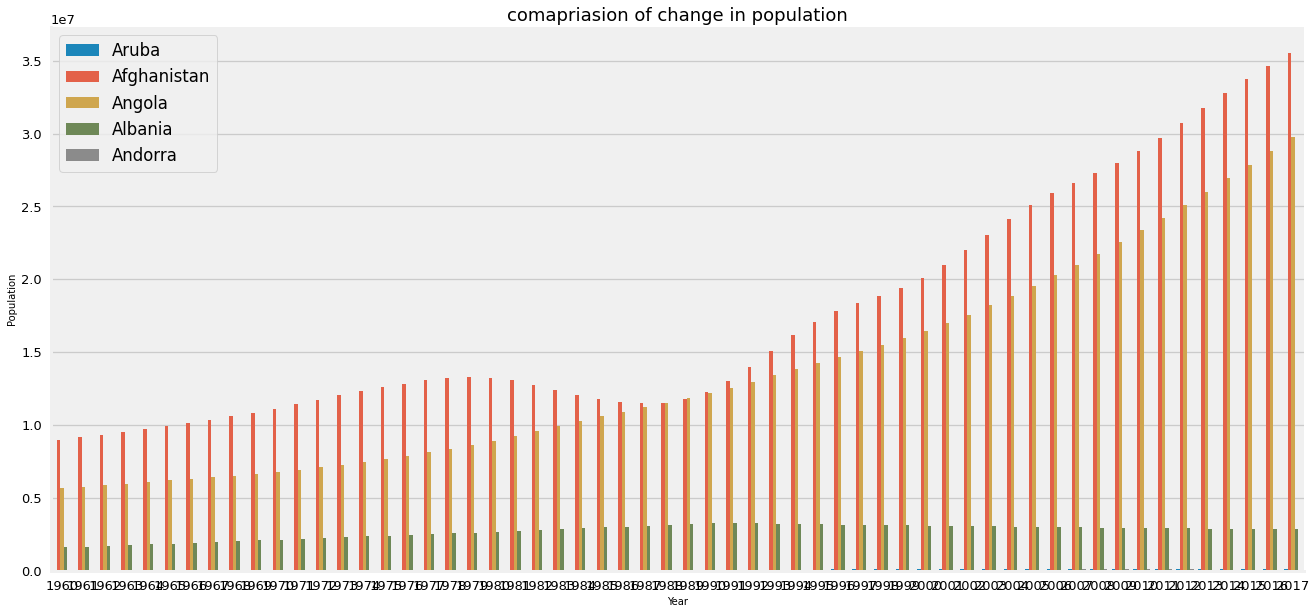

In [ ]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sns.barplot(x="Year", y="population", data=top_popultion, hue='Country Name')
ax.set_ylabel(ylabel = 'Population', fontsize = 10)
ax.set_xlabel(xlabel = 'Year', fontsize = 10)
ax.set_title('comapriasion of change in population')
ax.legend();

In [ ]:
def country_wise_population(country):
    return population[population['Country Name'] == country]

In [ ]:
china_population = country_wise_population('India')


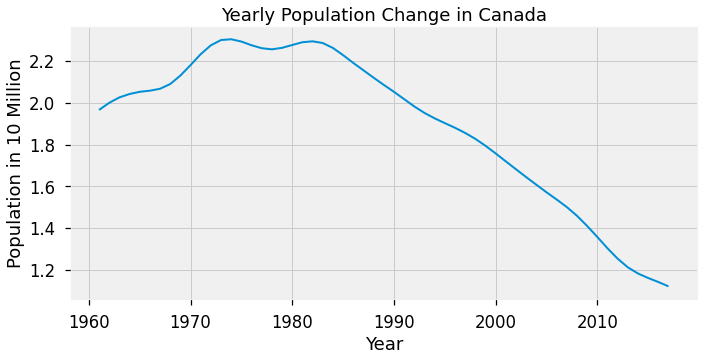

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(china_population['Year'], china_population['yearly change'])
plt.title('Yearly Population Change in Canada')
plt.xlabel('Year')
plt.ylabel('Population in 10 Million')
plt.show()

In [ ]:
population_2017 = population[population['Year'] == 2017]
fig = px.choropleth(population_2017, locations="Country Name", 
                    locationmode='country names', color="population", 
                    hover_name="Country Name",
                    color_continuous_scale="dense", 
                    title='Population of Countries in 2017')
fig.update(layout_coloraxis_showscale=True)
fig.show()

In [ ]:
population_more_than_one_million = population[(population['population'] >= 1000000) & (population['Year']==2017)]
number_of_countries = population_more_than_one_million.shape[0]
print("There are {} countries in the world with more than 1 million population.".format(number_of_countries))

There are 204 countries in the world with more than 1 million population.


In [ ]:
fig = px.choropleth(population_more_than_one_million, locations="Country Name", 
                    locationmode='country names', color="population", 
                    hover_name="Country Name",
                    color_continuous_scale="blues", 
                    title='Countries with more than 1 million Population')
fig.update(layout_coloraxis_showscale=True)
fig.show()

In [ ]:
population_more_than_one_billion = population[(population['population'] >= 1000000000) & (population['Year']==2017)]
number_of_countries = population_more_than_one_billion.shape[0]
print("There are {} countries in the world with more than 1 Billion population.".format(number_of_countries))


There are 25 countries in the world with more than 1 Billion population.


In [ ]:
fig = px.choropleth(population_more_than_one_billion, locations="Country Name", 
                    locationmode='country names', color="population", 
                    hover_name="Country Name",
                    color_continuous_scale="reds", 
                    title='Countries with more than 1 billion Population')
fig.update(layout_coloraxis_showscale=True)
fig.show()